# <span style="color:#0b486b">SIT307 - Assessment 2</span>

## <span style="color:#0b486b">Cleaning Data</span>

This section of the assessment is critical to ensure that the data source is valid and removes any outliers.  These can lead to invalid or skewed results once analysis is undertaken if they remain.  The following is broken down into specific groups to ensure that it can be easily audited by other users.

In [1]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#show base data from vehicles.csv file
df = pd.read_csv('../Data/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

In [4]:
#get number of rows and columns in dataframe
r,c = df.shape

#create dictionary how many rows in each column have zero values
missing_rows=df.apply(lambda x: round((r-x.count())/r,3), axis=0).to_dict()

#create an array to automatically drop columns
drop_columns=[]
filter_percentage = 0.4

for key,value in missing_rows.items():
    if value >= filter_percentage:
        drop_columns.append(key)

drop_columns

['condition', 'cylinders', 'vin', 'size', 'county']

In [5]:
#add more columns manually to drop based on viewing data, such as url which holds no real value in terms of data analysis
drop_columns.extend(['url','region_url', 'title_status', 'image_url', 'lat','long', 'description'])
drop_columns

['condition',
 'cylinders',
 'vin',
 'size',
 'county',
 'url',
 'region_url',
 'title_status',
 'image_url',
 'lat',
 'long',
 'description']

In [6]:
#drop columns from data frame
dropped_df = df.drop(columns=drop_columns)

#drop rows based on null values
dropped_df = dropped_df.dropna()
dropped_df

,id,region,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,paint_color,state
1,7088745301,greensboro,0,2011.0,bmw,335,gas,115120.0,automatic,rwd,convertible,blue,nc
3,7088743681,greensboro,3995,2004.0,honda,element,gas,212526.0,automatic,fwd,SUV,orange,nc
6,7088741418,greensboro,10995,2014.0,chevrolet,traverse,gas,112383.0,automatic,fwd,SUV,black,nc
8,7088737004,greensboro,3995,2007.0,toyota,solara,gas,185123.0,automatic,fwd,convertible,black,nc
10,7088732376,greensboro,7995,2008.0,nissan,frontier,gas,162214.0,automatic,fwd,pickup,red,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539736,7088767324,greensboro,6695,2012.0,volvo,s60,gas,121898.0,automatic,fwd,sedan,silver,nc
539744,7076307686,syracuse,6300,2014.0,nissan,altima,gas,85000.0,automatic,fwd,sedan,grey,ny
539752,7093462901,denver,5295,2006.0,audi,a4 2.0t avant quattro,gas,150000.0,automatic,4wd,wagon,custom,co
539755,7088752165,greensboro,13995,2016.0,nissan,frontier,gas,97545.0,automatic,4wd,pickup,silver,nc


In [7]:
#review of manufacturer names to ensure they are similar throughout
man = dropped_df['manufacturer'].unique()
man.sort()
print(man)
print("%s \n" % (len(man)))

mod = dropped_df['model'].unique()
mod.sort()
print(mod)
print("%s \n" % (len(mod)))


['acura' 'alfa-romeo' 'aston-martin' 'audi' 'bmw' 'buick' 'cadillac'
 'chevrolet' 'chrysler' 'datsun' 'dodge' 'ferrari' 'fiat' 'ford' 'gmc'
 'harley-davidson' 'hennessey' 'honda' 'hyundai' 'infiniti' 'jaguar'
 'jeep' 'kia' 'land rover' 'lexus' 'lincoln' 'mazda' 'mercedes-benz'
 'mercury' 'mini' 'mitsubishi' 'morgan' 'nissan' 'pontiac' 'porche' 'ram'
 'rover' 'saturn' 'subaru' 'tesla' 'toyota' 'volkswagen' 'volvo']
43 

['& western snow plow' '(dodge) 1500 rebel' '(ford) comet' ... 'zypher'
 '| 405-634-8900 | i-240 automatic' '￼ accord vp￼ ￼']
17805 



In [8]:
#possibly too many models to make useful labelling data
#dropped_df = dropped_df.drop(column='model')

In [9]:
dropped_df=dropped_df[dropped_df['price'] < 250000]

In [10]:
#test to see what the max and min price is
print("Max Price is %s" % (dropped_df['price'].max()))
print("Min Price is %s" % (dropped_df['price'].min()))

#see what the interquartile range is
Q1_price = dropped_df['price'].quantile(0.25)
Q3_price = dropped_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
print("Q1 is %s" % (Q1_price))
print("Q3 is %s" % (Q3_price))
print("IQR is %s" % (IQR_price))

#find outlier thresholds
print("Upper Limit is %s" % (Q3_price + (1.5*IQR_price)))
print("Lower Limit is %s" % (Q1_price - (1.5*IQR_price)))

Max Price is 240000
Min Price is 0
Q1 is 4999.0
Q3 is 18695.0
IQR is 13696.0
Upper Limit is 39239.0
Lower Limit is -15545.0


In [11]:
outlier_df=dropped_df[dropped_df['price'] > (Q3_price + (1.5*IQR_price))]

outlier_df.sort_values(by=['price'], ascending=False)

,id,region,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,paint_color,state
434848,7091687586,san diego,240000,2018.0,acura,tlx,gas,19626.0,automatic,fwd,sedan,grey,ca
490237,7084804440,toledo,235000,1969.0,dodge,dart 440gts pilot car,gas,37500.0,automatic,rwd,sedan,green,oh
369598,7078483741,lincoln,228841,2005.0,gmc,savana,gas,228841.0,automatic,rwd,van,white,ne
348492,7092908370,los angeles,223000,2017.0,ferrari,488 gtb,gas,3960.0,automatic,rwd,coupe,black,ca
30251,7092908993,denver,223000,2017.0,ferrari,488 gtb,gas,3960.0,automatic,rwd,coupe,black,co
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287955,7088289802,corpus christi,39326,2016.0,chevrolet,tahoe,gas,42346.0,automatic,rwd,SUV,black,tx
412112,7088557877,reno / tahoe,39301,2012.0,gmc,sierra,other,93836.0,automatic,4wd,pickup,black,ca
363314,7090182805,joplin,39263,2015.0,chevrolet,silverado 2500hd,diesel,76523.0,automatic,4wd,truck,white,mo
472347,7089501953,pittsburgh,39250,2018.0,jeep,wrangler unlimited sahara,gas,10200.0,manual,4wd,SUV,red,pa


In [12]:
#alternative check using scipy
#checking z component for each 'price' row
z = np.abs(stats.zscore(dropped_df['price']))
print(z)

[1.1862688  0.82659785 0.19638592 ... 0.70955849 0.0737049  0.60152216]


In [13]:
#set random threshold to test z value against.  This is arbitrary to test results
z_threshold = 1

#find which row where the z value is greater than the threshold
outliers = np.where(z > z_threshold)
print(outliers)
print(dropped_df.iloc[outliers].sort_values(by='price'))

r,c = df.shape

print(r)

dropped_df = dropped_df[(z < 2)]
dropped_df.sort_values(by=['price'], ascending=False)

(array([     0,     14,     15, ..., 249532, 249546, 249548], dtype=int64),)
                id       region   price    year manufacturer  \
1       7088745301   greensboro       0  2011.0          bmw   
332262  7077529740         erie       0  2014.0         ford   
332264  7077518805         erie       0  2016.0         ford   
332334  7093459740  los angeles       0  2016.0         ford   
332398  7093452669  los angeles       0  2010.0        honda   
...            ...          ...     ...     ...          ...   
348492  7092908370  los angeles  223000  2017.0      ferrari   
30251   7092908993       denver  223000  2017.0      ferrari   
369598  7078483741      lincoln  228841  2005.0          gmc   
490237  7084804440       toledo  235000  1969.0        dodge   
434848  7091687586    san diego  240000  2018.0        acura   

                        model   fuel  odometer transmission drive  \
1                         335    gas  115120.0    automatic   rwd   
332262          

,id,region,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,paint_color,state
201489,7087916255,waterloo / cedar falls,35360,2019.0,ram,1500,gas,15165.0,automatic,4wd,truck,red,ia
257247,7093467813,moses lake,35351,2019.0,dodge,durango r/t awd gas suv,gas,14334.0,automatic,4wd,SUV,black,wa
516955,7082141946,columbus,35350,2017.0,gmc,sierra 1500,gas,25109.0,automatic,4wd,pickup,white,ga
206685,7079148769,northern michigan,35350,2017.0,chevrolet,silverado 1500,gas,42000.0,automatic,4wd,truck,black,mi
207483,7079143260,saginaw-midland-baycity,35350,2017.0,chevrolet,silverado 1500,gas,42000.0,automatic,4wd,truck,black,mi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140883,7081934533,pullman / moscow,0,2008.0,gmc,yukon,gas,152917.0,automatic,4wd,SUV,red,id
500902,7090553314,greenville / upstate,0,2012.0,chevrolet,colorado,gas,93683.0,automatic,rwd,truck,white,sc
500901,7090553344,greenville / upstate,0,2019.0,ram,promaster,gas,0.0,automatic,fwd,van,white,sc
140884,7081934500,pullman / moscow,0,2010.0,infiniti,g37 coupe,gas,107000.0,automatic,rwd,coupe,white,id


The above results show that even though a small threshold variance there are not a lot of data points which are being recognised as outliers.  This could be due to the fact that there are such high extremes in the price column that this might need to be run again once problematic rows are removed.

### Remove Outliers

In [14]:
#remove rows where there are outlier prices
dropped_df=dropped_df[dropped_df['price'] < (Q3_price + (1.5*IQR_price))]
dropped_df=dropped_df[dropped_df['price'] > 100]
dropped_df.sort_values(by=['price'])

,id,region,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,paint_color,state
483832,7081042550,dayton / springfield,105,2016.0,ford,focus,gas,97831.0,automatic,fwd,sedan,red,oh
483902,7080730500,dayton / springfield,105,2008.0,dodge,nitro,gas,115079.0,automatic,4wd,SUV,black,oh
483635,7081581099,dayton / springfield,105,2012.0,dodge,journey,gas,112966.0,automatic,fwd,SUV,grey,oh
483627,7081599967,dayton / springfield,105,2011.0,dodge,journey,gas,89985.0,automatic,fwd,SUV,silver,oh
62329,7078735688,dayton / springfield,105,2015.0,kia,forte,gas,100748.0,automatic,fwd,sedan,silver,oh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516955,7082141946,columbus,35350,2017.0,gmc,sierra 1500,gas,25109.0,automatic,4wd,pickup,white,ga
207483,7079143260,saginaw-midland-baycity,35350,2017.0,chevrolet,silverado 1500,gas,42000.0,automatic,4wd,truck,black,mi
206685,7079148769,northern michigan,35350,2017.0,chevrolet,silverado 1500,gas,42000.0,automatic,4wd,truck,black,mi
257247,7093467813,moses lake,35351,2019.0,dodge,durango r/t awd gas suv,gas,14334.0,automatic,4wd,SUV,black,wa


In [15]:
#check for list of unique years
year_unique = dropped_df['year'].unique()
year_unique.sort()
year_unique

array([1908., 1923., 1925., 1926., 1927., 1928., 1929., 1930., 1931.,
       1932., 1933., 1934., 1935., 1936., 1937., 1939., 1940., 1941.,
       1942., 1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953.,
       1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962.,
       1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971.,
       1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980.,
       1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989.,
       1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021.])

In [16]:
#remove any years which seem obsurd, such as being a product of the future
dropped_df=dropped_df[dropped_df['year'] <= 2020]
dropped_df.sort_values(by=['year'])

,id,region,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,paint_color,state
351703,7087408369,mcallen / edinburg,12995,1908.0,gmc,yukon,gas,169328.0,automatic,rwd,SUV,black,tx
351699,7087414624,mcallen / edinburg,15995,1908.0,nissan,armada,gas,56691.0,automatic,rwd,SUV,black,tx
351704,7087402329,mcallen / edinburg,12995,1908.0,cadillac,escalade,gas,173618.0,automatic,rwd,SUV,white,tx
106118,7087720280,greenville / upstate,8500,1923.0,ford,roadster,gas,400.0,automatic,rwd,other,black,sc
148207,7085756225,south dakota,24750,1923.0,ford,t,gas,5300.0,automatic,rwd,convertible,blue,sd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168477,7086792113,des moines,34286,2020.0,chevrolet,colorado,gas,5.0,automatic,4wd,pickup,black,ia
360500,7090556803,columbia / jeff city,34286,2020.0,chevrolet,colorado,gas,5.0,automatic,4wd,pickup,black,mo
490719,7089547496,stockton,24981,2020.0,chevrolet,equinox,gas,20420.0,automatic,4wd,SUV,blue,ca
199704,7078104345,kenosha-racine,349,2020.0,jeep,compass,gas,10.0,automatic,4wd,SUV,white,wi


In [17]:
dropped_df.describe()

,id,price,year,odometer
count,2.185870e+05,218587.000000,218587.000000,2.185870e+05
mean,7.087694e+09,12946.018066,2010.424563,1.063993e+05
std,5.196991e+06,8301.154656,6.821585,2.271602e+05
min,7.069217e+09,105.000000,1908.000000,0.000000e+00
25%,7.084431e+09,5997.000000,2007.000000,5.411200e+04
50%,7.089024e+09,11477.000000,2012.000000,9.941300e+04
75%,7.092129e+09,18000.000000,2015.000000,1.426000e+05
max,7.093537e+09,35360.000000,2020.000000,6.480922e+07





## <span style="color:#0b486b">Explore Data</span>

Once the data has been cleaned it is possible to explore the data.  This ensures that the data is of a high standard whilst simultaneously showing possible correlations.

In [18]:
#use geopandas to see where data is spatially
file_shape = '../Data/usa.shp'
map_df = gpd.read_file(file_shape)
map_df.head()

,stusps,statefp,name,awater,statens,geoid,lsad,affgeoid,aland,D_AREA,geometry
0,MS,28,Mississippi,3926919758,01779790,28,00,0400000US28,121533519481,11.885417,"MULTIPOLYGON Z (((-88.50297 30.21523 0.00000, ..."
1,NC,37,North Carolina,13466071395,01027616,37,00,0400000US37,125923656064,12.782192,"MULTIPOLYGON Z (((-75.72681 35.93584 0.00000, ..."
2,OK,40,Oklahoma,3374587997,01102857,40,00,0400000US40,177662925723,18.005001,"POLYGON Z ((-103.00257 36.52659 0.00000, -103...."
3,VA,51,Virginia,8528531774,01779803,51,00,0400000US51,102257717110,10.685779,"MULTIPOLYGON Z (((-75.74241 37.80835 0.00000, ..."
4,WV,54,West Virginia,489028543,01779805,54,00,0400000US54,62266474513,6.493880,"POLYGON Z ((-82.64320 38.16909 0.00000, -82.64..."


In [19]:
#Count and find mean price of all cars by state
count_by_state = dropped_df.groupby('state')['id'].count()
mean_price_by_state = dropped_df.groupby('state')['price'].mean()

print(dropped_df)

#Create new dataframe including the sum of all cars and mean price by state
new_df=pd.DataFrame()
new_df['state']=count_by_state.index.tolist()
new_df['state']=new_df['state'].str.upper()
new_df['count']=count_by_state.array
new_df['price']=mean_price_by_state.array
new_df

                id      region  price    year manufacturer  \
3       7088743681  greensboro   3995  2004.0        honda   
6       7088741418  greensboro  10995  2014.0    chevrolet   
8       7088737004  greensboro   3995  2007.0       toyota   
10      7088732376  greensboro   7995  2008.0       nissan   
13      7093461424      denver   7995  2010.0    chevrolet   
...            ...         ...    ...     ...          ...   
539736  7088767324  greensboro   6695  2012.0        volvo   
539744  7076307686    syracuse   6300  2014.0       nissan   
539752  7093462901      denver   5295  2006.0         audi   
539755  7088752165  greensboro  13995  2016.0       nissan   
539757  7088747986  greensboro   6495  2015.0        dodge   

                        model   fuel  odometer transmission drive  \
3                     element    gas  212526.0    automatic   fwd   
6                    traverse    gas  112383.0    automatic   fwd   
8                      solara    gas  185123.0  

,state,count,price
0,AK,2038,19609.538273
1,AL,3494,12919.349456
2,AR,1940,12980.955155
3,AZ,4062,12660.516248
4,CA,21399,13883.187719
5,CO,5609,14633.213050
6,CT,2871,10170.134796
7,DC,1213,11674.732894
8,DE,690,11241.472464
9,FL,15778,13745.114717


In [20]:
#merge the new data frame into the map data frame
merged_map_info = map_df.set_index('stusps').join(new_df.set_index('state'))
merged_map_info

,statefp,name,awater,statens,geoid,lsad,affgeoid,aland,D_AREA,geometry,count,price
stusps,,,,,,,,,,,,
MS,28,Mississippi,3926919758,01779790,28,00,0400000US28,121533519481,11.885417,"MULTIPOLYGON Z (((-88.50297 30.21523 0.00000, ...",1017.0,13513.640118
NC,37,North Carolina,13466071395,01027616,37,00,0400000US37,125923656064,12.782192,"MULTIPOLYGON Z (((-75.72681 35.93584 0.00000, ...",7362.0,12786.063434
OK,40,Oklahoma,3374587997,01102857,40,00,0400000US40,177662925723,18.005001,"POLYGON Z ((-103.00257 36.52659 0.00000, -103....",2758.0,12916.678390
VA,51,Virginia,8528531774,01779803,51,00,0400000US51,102257717110,10.685779,"MULTIPOLYGON Z (((-75.74241 37.80835 0.00000, ...",5404.0,10474.252961
WV,54,West Virginia,489028543,01779805,54,00,0400000US54,62266474513,6.493880,"POLYGON Z ((-82.64320 38.16909 0.00000, -82.64...",534.0,14332.848315
LA,22,Louisiana,23753621895,01629543,22,00,0400000US22,111897594374,11.544209,"MULTIPOLYGON Z (((-88.86770 29.86155 0.00000, ...",2228.0,9854.051616
MI,26,Michigan,103885855702,01779789,26,00,0400000US26,146600952990,17.054770,"MULTIPOLYGON Z (((-83.19159 42.03537 0.00000, ...",8587.0,12018.572610
MA,25,Massachusetts,7129925486,00606926,25,00,0400000US25,20205125364,2.318548,"MULTIPOLYGON Z (((-70.23405 41.28565 0.00000, ...",4918.0,11282.733225
ID,16,Idaho,2391722557,01779783,16,00,0400000US16,214049787659,24.456461,"POLYGON Z ((-117.24267 44.39655 0.00000, -117....",4496.0,16434.038479


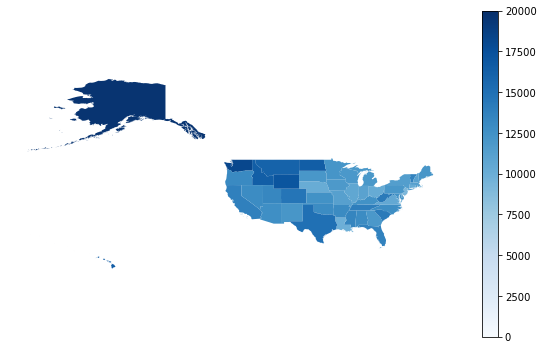

In [21]:
#plot graph based on variable
variable='price'
vmin = 0
vmax = math.ceil(merged_map_info[variable].max()/1000)*1000
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

merged_map_info.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, norm=plt.Normalize(vmin=vmin, vmax=vmax))

Text(0.5, 1.0, 'Total number of cars per manufacturer')

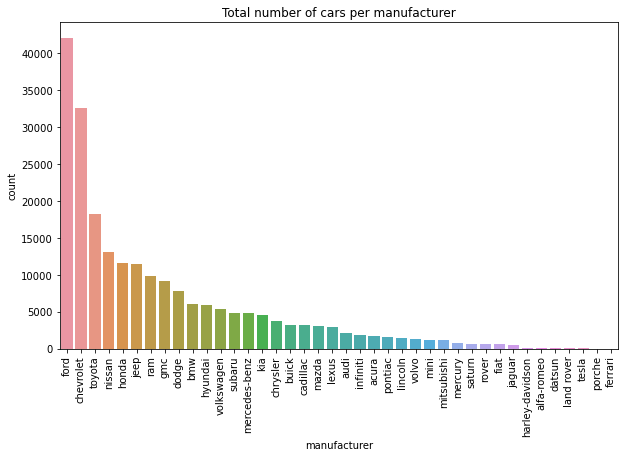

In [22]:
#create simple bar chart
plt.figure(figsize=(10,6))
ax = sns.countplot(x='manufacturer',data=dropped_df, order=dropped_df['manufacturer'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)
plt.title("Total number of cars per manufacturer")

Text(0.5, 1.0, 'Car manufacturer vs average price')

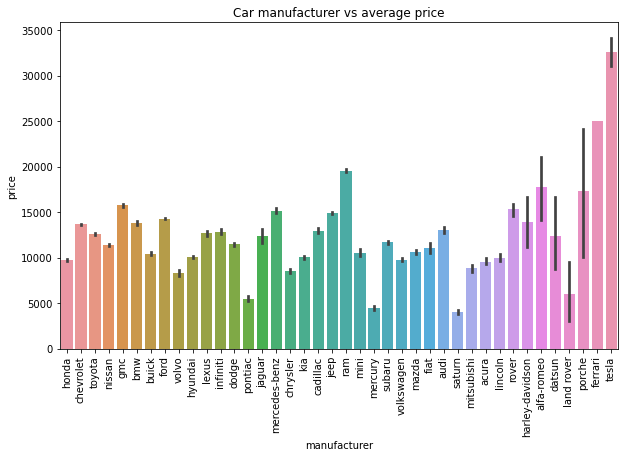

In [23]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='manufacturer', y='price', data=dropped_df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)
plt.title("Car manufacturer vs average price")

Text(0.5, 1.0, 'Year vs Price')

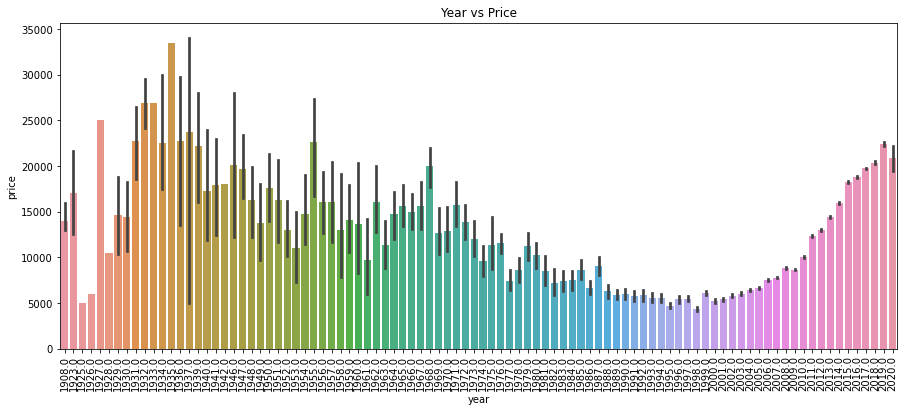

In [24]:
order = dropped_df['year'].unique()
order.sort()
plt.figure(figsize=(15,6))
ax = sns.barplot(x='year', y='price', data=dropped_df, order=order)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)
plt.title("Year vs Price")

### Reducing memory usage

In [25]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = dropped_df.columns.values.tolist()
for col in features:
    if dropped_df[col].dtype in numerics: continue
    categorical_columns.append(col)
    
    
for col in categorical_columns:
    if col in dropped_df.columns:
        le = preprocessing.LabelEncoder()
        le.fit(list(dropped_df[col].astype(str).values))
        dropped_df[col] = le.transform(list(dropped_df[col].astype(str).values))

In [26]:
def reduce_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Decreased usage to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

df = reduce_usage(dropped_df)

Decreased usage to 17.71 Mb (46.9% reduction)


### Selecting abnormal values

In [27]:
df_stats = dropped_df.describe(percentiles = [.05,.1, .9,.95])
df_stats

,id,region,price,year,manufacturer,model,fuel,odometer,transmission,drive,type,paint_color,state
count,2.185870e+05,218587.000000,218587.000000,218587.0,218587.000000,218587.000000,218587.000000,2.185870e+05,218587.000000,218587.000000,218587.000000,218587.000000,218587.000000
mean,7.087694e+09,194.495382,12946.018066,NaN,17.581576,8377.744697,1.930215,1.063993e+05,0.166131,0.756486,6.120405,5.620073,24.055278
std,5.196991e+06,119.147835,8301.154656,NaN,11.045236,4609.810893,0.607925,2.271602e+05,0.497692,0.751476,4.092574,4.034836,15.202117
min,7.069217e+09,0.000000,105.000000,1908.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
5%,7.076965e+09,15.000000,2500.000000,2000.0,4.000000,871.000000,0.000000,1.653090e+04,0.000000,0.000000,0.000000,0.000000,3.000000
10%,7.079196e+09,30.000000,3500.000000,2003.0,6.000000,2127.000000,2.000000,2.731080e+04,0.000000,0.000000,0.000000,0.000000,4.000000
50%,7.089024e+09,195.000000,11477.000000,2012.0,13.000000,8140.000000,2.000000,9.941300e+04,0.000000,1.000000,8.000000,8.000000,23.000000
90%,7.093038e+09,363.000000,25500.000000,2017.0,37.000000,14679.000000,2.000000,1.829570e+05,1.000000,2.000000,10.000000,10.000000,45.000000
95%,7.093257e+09,384.000000,28999.000000,2018.0,37.000000,15614.000000,2.000000,2.095980e+05,2.000000,2.000000,11.000000,10.000000,47.000000
max,7.093537e+09,402.000000,35360.000000,2020.0,39.000000,16450.000000,4.000000,6.480922e+07,2.000000,2.000000,12.000000,11.000000,50.000000


In [28]:
df_stats.loc['max',:]-df_stats.loc['95%',:]

id                279489.6
region                18.0
price               6361.0
year                   2.0
manufacturer           2.0
model                836.0
fuel                   2.0
odometer        64599618.0
transmission           0.0
drive                  0.0
type                   1.0
paint_color            1.0
state                  3.0
dtype: float64

In [29]:
df_stats.loc['95%',:]-df_stats.loc['90%',:]

id              219390.4
region              21.0
price             3499.0
year                 1.0
manufacturer         0.0
model              935.0
fuel                 0.0
odometer         26641.0
transmission         1.0
drive                0.0
type                 1.0
paint_color          0.0
state                2.0
dtype: float64

In [30]:
df_stats.loc['10%',:]-df_stats.loc['5%',:]

id              2231370.5
region               15.0
price              1000.0
year                  3.0
manufacturer          2.0
model              1256.0
fuel                  2.0
odometer          10779.9
transmission          0.0
drive                 0.0
type                  0.0
paint_color           0.0
state                 1.0
dtype: float64